In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

Matplotlib is building the font cache; this may take a moment.


dimension de X:  (100, 2)
dimension de y:  (100, 1)


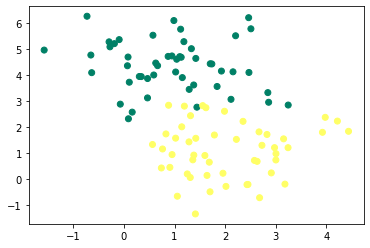

[[1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]]


In [7]:
X,y = make_blobs(n_samples = 100 , n_features = 2 , centers = 2 , random_state = 0)
y = y.reshape((y.shape[0],1))

print('dimension de X: ',X.shape)
print('dimension de y: ',y.shape)

plt.scatter(X[:,0],X[:,1],c=y,cmap = 'summer')
plt.show()
print(y)


In [11]:
def initialisation(X):
    W = np.random.randn(X.shape[1],1)
    b = np.random.randn(1)
    return(W,b)

In [16]:

W,b = initialisation(X)

In [23]:
def model(X,W,b):
    Z = X.dot(W)+b
    A = 1/(1+ np.exp(-Z))
    return A

In [25]:
A = model(X,W,b)
print(A.shape)

(100, 1)


In [26]:
def log_loss(A,y):
    return 1/len(y) * np.sum(-y*np.log(A) - (1-y)*np.log(1-A))

In [27]:
print(log_loss(A,y))

1.0291333397630387


In [28]:
def gradients(A,X,y):
    dW = 1/len(y) * np.dot(X.T, A-y)
    db = 1 /len(y) * np.sum(A-y)
    return(dW,db)

In [30]:
dW , db = gradients(A,X,y)
print(dW.shape)
print(db.shape)

(2, 1)
()


In [33]:
def update(dW,db , W,b,learning_rate):
    W = W -learning_rate * dW
    b=b - learning_rate * db
    return (W , b)

In [37]:
def artificial_neurone(X,y,learning_rate = 0.1,n = 100):
    W,b = initialisation(X)
    
    Loss = []
    for i in range(n):
        A = model(X,W,b)
        Loss.append(log_loss(A,y))
        dW , db = gradients(A,X,y)
        W,b = update(dW , db , W ,b , learning_rate)

    plt.plot(Loss)
    plt.show()

    return (W,b)


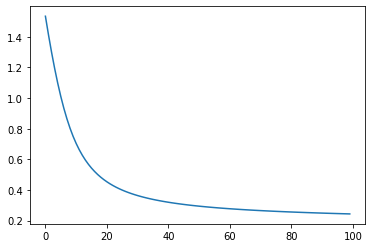

In [38]:
W,b = artificial_neurone(X,y)

In [42]:
def predict(X,W,b):
   A = model(X,W,b)
   return A

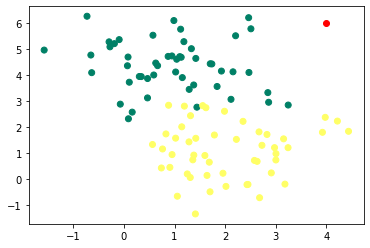

[0.30340644]


In [45]:
new_plant = np.array([4,6])

plt.scatter(X[:,0],X[:,1],c=y,cmap = 'summer')
plt.scatter(new_plant[0],new_plant[1],c='r')
plt.show()
print(predict(new_plant,W,b))
